# Machine Learning: Lab 4
## Regression & Clustering
TA: Bryan Coulier (bryan.coulier@kuleuven.be)


In [226]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score

### Regression
Use the following regression techniques to create a ML model of the Housing.csv dataset:
- SVM regression (use grid search)
- KNN regression (use grid search)
- Linear regression
- Decision Tree regression

Make a train and test split, scale the features before training your models and compare the performance of the models by using the appropriate accuracy metrics

load the dataset

In [227]:
df = pd.read_csv('Housing.csv')
df = df.drop('index', axis=1)  # Remove redundant index column
X = df.drop('medv', axis=1)
y = df['medv']

Split data

In [228]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale features

In [229]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr regressie

In [230]:
svr = SVR()
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.5]
}
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_

knn regressie

In [231]:
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

linear regression

In [232]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

Decision Tree

In [233]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

Evalueren van de performantie

In [234]:

from sklearn.metrics import mean_absolute_error, r2_score
models = [
    ('SVM Regression', best_svr),
    ('KNN Regression', best_knn),
    ('Linear Regression', lr),
    ('Decision Tree Regression', dt)
]

for name, model in models:
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  RMSE: {rmse:.2f}')
    print(f'  MAE: {mae:.2f}')
    print(f'  R²: {r2:.2f}\n')

SVM Regression:
  MSE: 12.74
  RMSE: 3.57
  MAE: 2.07
  R²: 0.83

KNN Regression:
  MSE: 15.69
  RMSE: 3.96
  MAE: 2.57
  R²: 0.79

Linear Regression:
  MSE: 24.29
  RMSE: 4.93
  MAE: 3.19
  R²: 0.67

Decision Tree Regression:
  MSE: 10.42
  RMSE: 3.23
  MAE: 2.39
  R²: 0.86



Use Randomized search for hyper parameter tuning with negative mean squared error as scoring, set the number of iterations to 1. Retrain the SVM with these new hyperparameters. Print out the best parameters and best score.

Definieren van de distributie parameters voor svm

In [235]:
param_dist_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.5]
}

Randomized seach met 1 iteratie

In [236]:
random_svr = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist_svr,
    n_iter=1,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

fitten op de trainin gdata 

In [237]:
random_svr.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.1, 0.5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_mean_squared_error')

uitprinten resultaten

In [238]:
print("Best Parameters:", random_svr.best_params_)
print("Best Score (Negative MSE):", random_svr.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1}
Best Score (Negative MSE): -32.3581401119639


### Clustering
Perform clustering on the following randomly generated samples by using a pipeline with a standardscaler.

artificeilee daaset gegenereerd : clusters bepalen

In [239]:

# Generate synthetic data with blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1.0)


# Create a pipeline with StandardScaler and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('kmeans', KMeans(n_clusters=3, n_init='auto', random_state=0))  # Cluster into 3 groups
])

# Fit the pipeline to the data and predict clusters
predicted_labels = pipeline.fit_predict(X)

# Evaluate clustering against true labels using Adjusted Rand Index
ari = adjusted_rand_score(y, predicted_labels)
print(f"Adjusted Rand Index: {ari:.2f}")



Adjusted Rand Index: 0.75


c:\Users\info\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plot the datapoints with a different color for each cluster, so you can visualy see the different clusters.

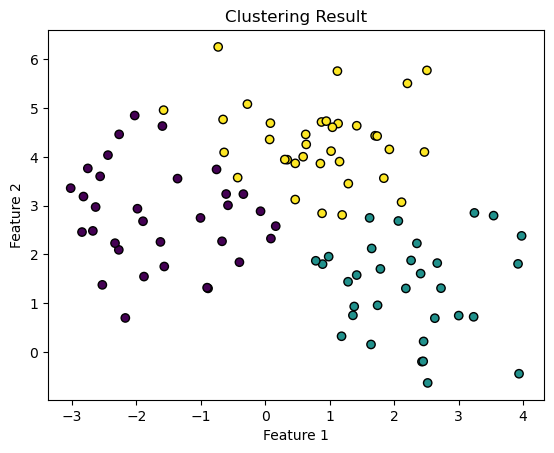

In [240]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k')
plt.title("Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Example

Given the "product_sales_clustering.csv" dataset containing customer purchase history for an online retailer, with the following columns:

- "Customer ID": a unique identifier for each customer.
- "Product Category": the category of the product purchased by the customer (e.g. electronics, clothing, home goods, etc.).
- "Purchase Amount": the amount spent by the customer on the product.

Your task is to perform clustering on this dataset to identify which customers are similar to each other based on their purchase history. 

- Use the elbow method to determine the optimal number of clusters, plot the elbow curve
- Fit the KMeans model with the chosen number of clusters
- Determine the accuracy of your clustering model, does your clustering model perform well?
- Given your clustering model, what are the characteristics of each cluster? What can you say about the purchase behavior of the customers in each cluster?

dataset van sales , telkens customer en de categrorie in wat die iets gekocht heeft , dan cluster genereen voor de dataset 
goed nadenken over het feit dat je niet meer clusters als categroeien hebt 

datasert omzetten in iets wat id eallemaal heeft gekeocht dus clusteren volgen B C en H


Stap 1 : data prepocessen

In [241]:
df = pd.read_csv("product_sales_clustering.csv")
df.head()


,Customer ID,Product Category,Purchase Amount
0,9586,home goods,40.46
1,2548,electronics,206.21
2,8823,beauty,10.14
3,9287,home goods,55.38
4,8786,home goods,51.88


Maak een customer-product matrix (GEEN Customer ID als feature!)

In [242]:
customer_product_matrix = pd.pivot_table(
    df,
    index='Customer ID',
    columns='Product Category',
    values='Purchase Amount',
    aggfunc='sum',
    fill_value=0
)

Schalen van de data 

In [243]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_product_matrix)

elbow method (op de juiste features)

In [244]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plotten van de elleboog curve

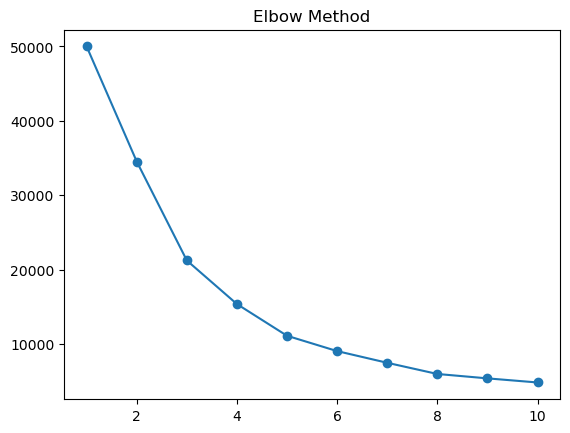

In [245]:

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.show()

interpretatie van de cluster , uit de elleboogcurve lijkt 3 de beste optei 

In [246]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

visualistatie van cluster aan de hand van pca

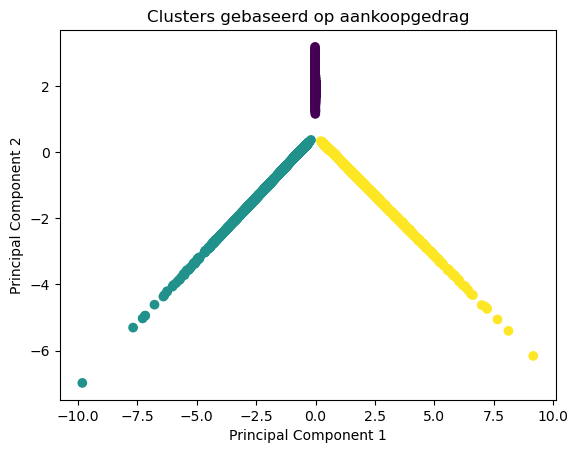

In [247]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.scatter(principal_components[:,0], 
            principal_components[:,1], 
            c=clusters, 
            cmap='viridis')
plt.title('Clusters gebaseerd op aankoopgedrag')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Het clusteringmodel lijkt visueel goed te werken , de groepen lijken logisch gerangschikt op de bovenstaande figuur
cluster samenvatting

In [248]:
customer_product_matrix['Cluster'] = clusters
cluster_summary = customer_product_matrix.groupby('Cluster').mean()

print("Cluster Summary (Average Purchases per Category):")
print(cluster_summary)

Cluster Summary (Average Purchases per Category):
Product Category     beauty    clothing  electronics  home goods     sports
Cluster                                                                    
0                  0.000000    0.000000     0.000000    0.000000  30.003145
1                  0.000000    0.000000   302.400574   50.084581   0.000000
2                 10.019193  150.453393     0.000000    0.000000   0.000000


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(pivot_data_scaled, pivot_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.5f}")

# Visualize the cluster profiles
cluster_summary.plot(kind='bar', figsize=(8, 4))
plt.title('Gemiddelde aankopen per cluster en categorie')
plt.ylabel('Gemiddeld aankoopbedrag')
plt.xlabel('Cluster')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

De **silhouette score** van mijn clusteringmodel is **0.53**, wat wijst op een **redelijk goede clustering**, maar met ruimte voor verbetering. De silhouette score is een maat voor hoe goed datapunten gegroepeerd zijn binnen hun cluster en hoe ver ze van andere clusters verwijderd zijn. De score ligt tussen **-1 en 1**:  

- **Dicht bij 1** betekent dat de clusters goed gescheiden zijn.  
- **Rond 0** wijst op overlap tussen clusters.  
- **Dicht bij -1** duidt op een slechte clustering, waarbij veel punten verkeerd geclassificeerd zijn.  

Met een score van **0.53** zijn de clusters dus **niet willekeurig**, maar er is wel enige overlap of ruis in de data. Dit kan betekenen dat:  
- Het aantal clusters nog niet optimaal is.  
- De gekozen afstandsmaat niet ideaal is.  
- Extra feature-engineering nodig is om betere scheiding te krijgen.  
- Een ander clustering-algoritme mogelijk betere resultaten oplevert.  


plotten van een heatmap

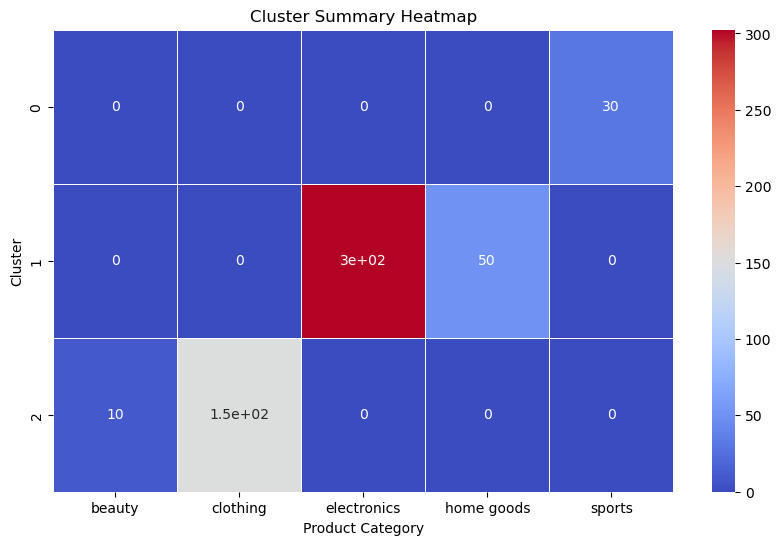

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Cluster Summary Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Cluster')
plt.show()

Op basis van het clusteringmodel kunnen we de volgende kenmerken per cluster identificeren en het koopgedrag van de klanten analyseren:  

- **Cluster 0**: Klanten in deze groep kopen uitsluitend **sportartikelen** (gemiddeld 30 aankopen per klant). Dit suggereert dat deze groep sterk geïnteresseerd is in sport en mogelijk actieve sportbeoefenaars zijn.  
- **Cluster 1**: Deze klanten kopen voornamelijk **elektronica** (gemiddeld 302 aankopen per klant) en in mindere mate **woonartikelen** (gemiddeld 50 aankopen per klant). Dit kan wijzen op technologische interesse of huishoudelijke behoeften.  
- **Cluster 2**: Klanten in dit cluster geven vooral geld uit aan **kleding** (150 aankopen per klant) en **beautyproducten** (10 aankopen per klant). Dit wijst mogelijk op modebewuste consumenten of een doelgroep die veel waarde hecht aan persoonlijke verzorging.  

De clusters tonen duidelijke scheidingen in koopgedrag, wat waardevolle inzichten biedt voor marketingstrategieën en gepersonaliseerde aanbiedingen.